In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
#from playsound import playsound

In [2]:
#playsound('~/Downloads/mario.mp3')

In [30]:
!ls ../../data/andresData/28-05-24-files/examples-to-match-emcee/

mDM50GeV-sigma2e-46-thetapidiv2  mDM50GeV-sigma5e-47-thetapidiv2
mDM50GeV-sigma2e-47-thetapidiv2


In [45]:
### DATA FOLDER ###

datFolder = '../../data/andresData/28-05-24-files/examples-to-match-emcee/mDM50GeV-sigma5e-47-thetapidiv2/'

### Signal Region

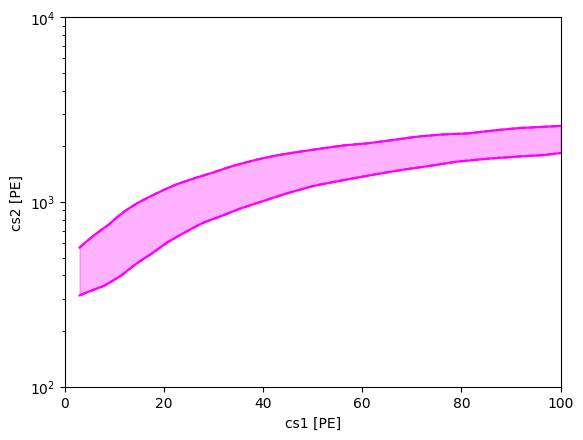

In [46]:
### DEFINE THE SIGNAL REGION ###

# NR signal region from https://arxiv.org/pdf/2303.14729.pdf Fig 1

SR_NR_up_x = [3.0, 5.8171745152354575, 8.86426592797784, 11.634349030470915, 14.681440443213297, 18.559556786703602, 22.437673130193907, 26.315789473684212, 29.91689750692521, 33.795013850415515, 38.78116343490305, 42.93628808864266, 47.091412742382275, 51.523545706371195, 56.23268698060942, 61.21883656509696, 66.2049861495845, 70.91412742382272, 75.90027700831025, 81.16343490304709, 86.98060941828255, 91.68975069252079, 96.12188365650971, 100.0]
SR_NR_up_y = [566.1625992822727, 657.1235910111466, 752.4377710364311, 873.3261623828438, 986.5466974037014, 1114.4454707535624, 1241.9887072831295, 1347.1370006941845, 1441.5294835084615, 1563.5711447601211, 1695.945003342086, 1790.3633397331932, 1864.6109714269562, 1941.9377048258257, 2022.4712324513557, 2078.007251824172, 2164.18367962871, 2253.933904734791, 2315.825769988508, 2347.4061350396037, 2444.754724726473, 2511.88643150958, 2546.1404291556805, 2580.861540418074]

SR_NR_down_x = [3.0, 8.033240997229917, 11.357340720221607, 14.40443213296399, 17.72853185595568, 20.775623268698062, 24.653739612188367, 27.977839335180057, 31.578947368421055, 35.45706371191136, 40.16620498614959, 44.875346260387815, 50.415512465373965, 57.34072022160665, 63.43490304709142, 68.69806094182826, 73.40720221606648, 78.94736842105263, 85.87257617728532, 92.24376731301939, 96.39889196675901, 100.0]
SR_NR_down_y = [311.9734581912619, 352.41860156398235, 398.1071705534973, 462.06798868918565, 529.0898275948218, 605.8330213665148, 693.7076289040954, 773.0993250593622, 838.5508659554567, 921.9468447849993, 1013.6367620830354, 1114.4454707535624, 1225.2798573828638, 1329.0135589851757, 1422.136151165336, 1501.3107289081743, 1563.5711447601211, 1650.619832085751, 1719.0722018585745, 1766.2770399664428, 1790.3633397331932, 1839.525795803971]


# Interpolate to get functions
inter_SR_NR_up = interp1d(SR_NR_up_x, SR_NR_up_y, kind='linear')
inter_SR_NR_down = interp1d(SR_NR_down_x, SR_NR_down_y, kind='linear')

x_inter_NR_up = np.linspace(min(SR_NR_up_x), max(SR_NR_up_x), 100)
y_inter_NR_up = inter_SR_NR_up(x_inter_NR_up)

x_inter_NR_down = np.linspace(min(SR_NR_down_x), max(SR_NR_down_x), 100)
y_inter_NR_down = inter_SR_NR_down(x_inter_NR_down)



# plot the SR_NR
plt.plot(SR_NR_up_x, SR_NR_up_y, '--', color='magenta')
plt.plot(SR_NR_down_x, SR_NR_down_y, '--', color='magenta')
# the interpolated SR_NR
plt.plot(x_inter_NR_up, y_inter_NR_up, '-', color='magenta')
plt.plot(x_inter_NR_down, y_inter_NR_down, '-', color='magenta')
plt.fill_between(x_inter_NR_up, y_inter_NR_up, y_inter_NR_down, where=(y_inter_NR_up > y_inter_NR_down), color='magenta', interpolate=True, alpha=0.3)

plt.xlabel('cs1 [PE]')
plt.ylabel('cs2 [PE]')
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([100,10000])
plt.show()

### Isoenergy curves, for the differential rates

In [47]:
# NUCLEAR RECOIL
# XENONnT to ~ match https://arxiv.org/pdf/2303.14729.pdf (APPROXIMATION, full is in https://arxiv.org/pdf/1412.4417.pdf)
g1 = 0.16#/1.227
g2 = 17.45#/1.227
W_LXe = 70

# ELECTRONIC RECOIL
# XENONnT keV ER
g1_ER = 0.151#/1.227
g2_ER = 16.45#/1.227
W_LXe_ER = 13.7  # [ev] Pag 8 and 12 https://www.uni-muenster.de/imperia/md/content/physik_kp/agweinheimer/theses/master_kevin_gauda.pdf



# Isoenergy curves FUNCTIONS
def cs2_nr(E_nr,cs1_nr):
    cs2_nr = g2 * ( ((E_nr*1000)/W_LXe) - (cs1_nr/g1) )
    
    return cs2_nr

def cs2_er(E_er,cs1_er):
    cs2_er = g2_ER * ( ((E_er*1000)/W_LXe_ER) - (cs1_er/g1_ER) )
    
    return cs2_er

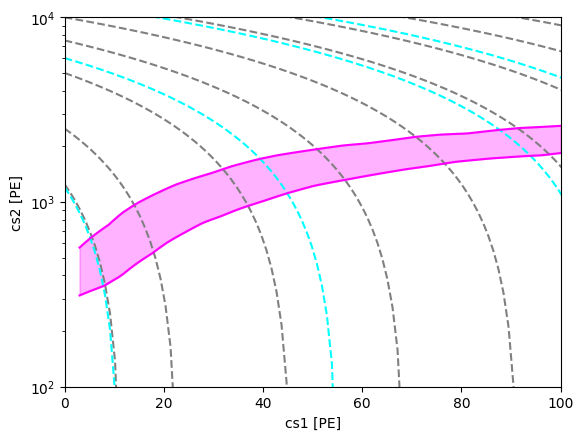

In [48]:

# Some examples to plot

cs1_range = np.linspace(0, 120, 119)

cs2_nr_5 = cs2_nr(5,cs1_range)
cs2_nr_10 = cs2_nr(10,cs1_range)
cs2_nr_20 = cs2_nr(20,cs1_range)
cs2_nr_30 = cs2_nr(30,cs1_range)
cs2_nr_40 = cs2_nr(40,cs1_range)
cs2_nr_50 = cs2_nr(50,cs1_range)
cs2_nr_60 = cs2_nr(60,cs1_range)
cs2_nr_70 = cs2_nr(70,cs1_range)
cs2_nr_80 = cs2_nr(80,cs1_range)

cs2_er_1 = cs2_er(1,cs1_range)
cs2_er_3 = cs2_er(3,cs1_range)
cs2_er_5 = cs2_er(5,cs1_range)
cs2_er_10 = cs2_er(10,cs1_range)
cs2_er_12 = cs2_er(12,cs1_range)
cs2_er_13 = cs2_er(13,cs1_range)



# plot the isoenergy curves
plt.plot(cs1_range, cs2_nr_5, '--', color='gray')
plt.plot(cs1_range, cs2_nr_10, '--', color='gray')
plt.plot(cs1_range, cs2_nr_20, '--', color='gray')
plt.plot(cs1_range, cs2_nr_30, '--', color='gray')
plt.plot(cs1_range, cs2_nr_40, '--', color='gray')
plt.plot(cs1_range, cs2_nr_50, '--', color='gray')
plt.plot(cs1_range, cs2_nr_60, '--', color='gray')
plt.plot(cs1_range, cs2_nr_70, '--', color='gray')
plt.plot(cs1_range, cs2_nr_80, '--', color='gray')

plt.plot(cs1_range, cs2_er_1, '--', color='cyan')
#plt.plot(cs1_range, cs2_er_3, '--', color='cyan')
plt.plot(cs1_range, cs2_er_5, '--', color='cyan')
plt.plot(cs1_range, cs2_er_10, '--', color='cyan')
#plt.plot(cs1_range, cs2_er_12, '--', color='cyan')
plt.plot(cs1_range, cs2_er_13, '--', color='cyan')

# the interpolated SR_NR
plt.plot(x_inter_NR_up, y_inter_NR_up, '-', color='magenta')
plt.plot(x_inter_NR_down, y_inter_NR_down, '-', color='magenta')
plt.fill_between(x_inter_NR_up, y_inter_NR_up, y_inter_NR_down, where=(y_inter_NR_up > y_inter_NR_down), color='magenta', interpolate=True, alpha=0.3)


plt.xlabel('cs1 [PE]')
plt.ylabel('cs2 [PE]')
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([100,10000])
plt.show()

### Binnings

In [49]:
### THE BINNING ###

# binning (cS1, cS2) ---> this is the saved binning (although if you plot, you get just the number of bins and not cS1 or cS2)
bin_to_plot = [np.linspace(3, 100, 98), np.logspace(*np.log10([100, 10000]), 98)]

# center of each bin
center_x = [bin_to_plot[0][i] + ((bin_to_plot[0][i+1]-bin_to_plot[0][i])/2) for i in range(len(bin_to_plot[0])-1)]
center_y = [bin_to_plot[1][i] + ((bin_to_plot[1][i+1]-bin_to_plot[1][i])/2) for i in range(len(bin_to_plot[1])-1)]



### RECOIL ENERGY ###

# we want the diff rate per recoil energy

# lets do bins in recoil energy. RANGE: form 3 keV_nr to 61 keV_nr
num_bins = 59   # number of bins
keVNR_space = np.linspace(3,61,num_bins)

# center of each bin
center_keVNR = [keVNR_space[i] + ((keVNR_space[i+1]-keVNR_space[i])/2) for i in range(len(keVNR_space)-1)]


print('Bin edges for the recoil energy:\n', keVNR_space)

Bin edges for the recoil energy:
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56.
 57. 58. 59. 60. 61.]


### DIFF RATES, and S1S2 masked (signal region)

In [50]:
# we are going to keep only the s1s2 region close to the signal region (lots of zeros)
# so, instead of 98*98 bins, we are going to have 98*47 bins

center_y_SR = []

low_cs2 = 300
high_cs2 = 2600

label_SR_y = 0

for i in range(len(center_y)):
    if low_cs2 < center_y[i] < high_cs2:
        center_y_SR.append( center_y[i] )
        
    if center_y[i] < low_cs2:
        label_SR_y += 1

print('For the full cS1 cS2 region: ')
print('cS1 bins: ', len(center_x)+1)
print('cS2 bins: ', len(center_y)+1)
        
print('\nFor the Signal Region: ')
print('cS1 bins: ', len(center_x)+1)
print('cS2 bins: ', len(center_y_SR)+1)

For the full cS1 cS2 region: 
cS1 bins:  98
cS2 bins:  98

For the Signal Region: 
cS1 bins:  98
cS2 bins:  47


In [51]:
### COMPUTE THE DIFFERENTIAL RATES and s1s2 in the SIGNAL REGION ######


######
# ER #
######

dats_er = np.loadtxt(datFolder+'s1s2_er.txt')


# for over every example
for ex in range(len(dats_er)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_er[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_er[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_er.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_er.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_er.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')

del(dats_er)

print('ER diff rate DONE')


######
# AC #
######

dats_ac = np.loadtxt(datFolder+'s1s2_ac.txt')


# for over every example
for ex in range(len(dats_ac)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_ac[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_ac[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_ac.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_ac.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_ac.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_ac)
    
print('AC diff rate DONE')

    
############
# cevns_sm #
############

dats_cevns_sm = np.loadtxt(datFolder+'s1s2_CEVNS-SM.txt')


# for over every example
for ex in range(len(dats_cevns_sm)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_cevns_sm[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_cevns_sm[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_CEVNS-SM.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_CEVNS-SM.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_CEVNS-SM.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_cevns_sm)
    
print('CEVNS_SM diff rate DONE')
    
    
#########
# radio #
#########

dats_radio = np.loadtxt(datFolder+'s1s2_radiogenics.txt')


# for over every example
for ex in range(len(dats_radio)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_radio[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_radio[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_radiogenics.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_radiogenics.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_radiogenics.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_radio)
    
print('Radiogenic diff rate DONE')
    
    
########
# wall #
########

dats_wall = np.loadtxt(datFolder+'s1s2_wall.txt')


# for over every example
for ex in range(len(dats_wall)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_wall[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_wall[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_wall.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_wall.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_wall.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_wall)
    
print('Wall diff rate DONE')
    
    
########
# wimp #
########

dats_wimp = np.loadtxt(datFolder+'s1s2_WIMP.txt')


# for over every example
for ex in range(len(dats_wimp)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_wimp[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_wimp[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_WIMP.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_WIMP.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_WIMP.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_wimp)
    
print('WIMP diff rate DONE')


#############
# cevns_nsi #
#############

dats_cevns_nsi = np.loadtxt(datFolder+'s1s2_CEVNS-NSI.txt')


# for over every example
for ex in range(len(dats_cevns_nsi)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_cevns_nsi[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_cevns_nsi[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_CEVNS-NSI.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_CEVNS-NSI.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_CEVNS-NSI.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_cevns_nsi)
    
print('CEVNS_NSI diff rate DONE')


###########
# eves_sm #
###########

dats_eves_sm = np.loadtxt(datFolder+'s1s2_EVES-SM.txt')


# for over every example
for ex in range(len(dats_eves_sm)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is ismde the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_eves_sm[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is ismde the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_eves_sm[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_EVES-SM.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_EVES-SM.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_EVES-SM.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_eves_sm)
    
print('EVES_SM diff rate DONE')


############
# eves_nsi #
############

dats_eves_nsi = np.loadtxt(datFolder+'s1s2_EVES-NSI.txt')


# for over every example
for ex in range(len(dats_eves_nsi)):
    
    # save the diff rate in each bin of a single example
    diff_rate_pseudo = np.zeros(len(keVNR_space)-1)
    # save the s1s2 masked in SR of a single example
    s1s2_masked_pseudo = np.zeros([len(center_x),len(center_y_SR)])

    # go through all the matrix elements
    for cx in range(len(center_x)):
        for cy in range(len(center_y)):
            
            ### DIFF RATE ###
            # for each recoil energy bin
            for NRi in range(len(keVNR_space)-1):
                # if cS1 and cS2 is inside the recoil energy bin
                if cs2_nr(keVNR_space[NRi],center_x[cx]) < center_y[cy] <= cs2_nr(keVNR_space[NRi+1],center_x[cx]):
                    diff_rate_pseudo[NRi] += dats_eves_nsi[ex].reshape( 97,97 )[cx,cy]
                    

            ### MASKED REGION (SR) ###
            # to avoid lots of zeros
            if low_cs2 < center_y[cy] < high_cs2: 
                # masked condition: if cS1 and cS2 is inside the Signal Region
                if inter_SR_NR_down( center_x[cx] ) <= center_y[cy] <= inter_SR_NR_up( center_x[cx] ):
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = dats_eves_nsi[ex].reshape( 97,97 )[cx,cy]    
                else:
                    s1s2_masked_pseudo[cx,cy-label_SR_y] = 0
                
                
    # save
    with open(datFolder+'diff_rate_EVES-NSI.txt', "a") as file:
        np.savetxt(file, diff_rate_pseudo, fmt='%d', newline=' ')
        file.write('\n')
                
    with open(datFolder+'SR_s1s2_EVES-NSI.txt', "a") as file:
        np.savetxt(file, s1s2_masked_pseudo.flatten().tolist(), fmt='%d', newline=' ')
        file.write('\n')
    
    with open(datFolder+'SR_rate_EVES-NSI.txt', "a") as file:
        np.savetxt(file, [sum(sum(s1s2_masked_pseudo))], fmt='%d', newline=' ')
        file.write('\n')
    
del(dats_eves_nsi)
    
print('EVES_NSI diff rate DONE')

ER diff rate DONE
AC diff rate DONE
CEVNS_SM diff rate DONE
Radiogenic diff rate DONE
Wall diff rate DONE
WIMP diff rate DONE
CEVNS_NSI diff rate DONE
EVES_SM diff rate DONE
EVES_NSI diff rate DONE


### LOAD

In [52]:
diff_rate_ac = np.loadtxt(datFolder+'diff_rate_ac.txt')
diff_rate_cevns_nsi = np.loadtxt(datFolder+'diff_rate_CEVNS-NSI.txt')
diff_rate_cevns_sm = np.loadtxt(datFolder+'diff_rate_CEVNS-SM.txt')
diff_rate_er = np.loadtxt(datFolder+'diff_rate_er.txt')
diff_rate_eves_nsi = np.loadtxt(datFolder+'diff_rate_EVES-NSI.txt')
diff_rate_eves_sm = np.loadtxt(datFolder+'diff_rate_EVES-SM.txt')
diff_rate_radio = np.loadtxt(datFolder+'diff_rate_radiogenics.txt')
diff_rate_wall = np.loadtxt(datFolder+'diff_rate_wall.txt')
diff_rate_wimp = np.loadtxt(datFolder+'diff_rate_WIMP.txt')

In [53]:
s1s2_masked_ac = np.loadtxt(datFolder+'SR_s1s2_ac.txt')
s1s2_masked_cevns_nsi = np.loadtxt(datFolder+'SR_s1s2_CEVNS-NSI.txt')
s1s2_masked_cevns_sm = np.loadtxt(datFolder+'SR_s1s2_CEVNS-SM.txt')
s1s2_masked_er = np.loadtxt(datFolder+'SR_s1s2_er.txt')
s1s2_masked_eves_nsi = np.loadtxt(datFolder+'SR_s1s2_EVES-NSI.txt')
s1s2_masked_eves_sm = np.loadtxt(datFolder+'SR_s1s2_EVES-SM.txt')
s1s2_masked_radio = np.loadtxt(datFolder+'SR_s1s2_radiogenics.txt')
s1s2_masked_wall = np.loadtxt(datFolder+'SR_s1s2_wall.txt')
s1s2_masked_wimp = np.loadtxt(datFolder+'SR_s1s2_WIMP.txt')

In [54]:
rate_masked_ac = np.loadtxt(datFolder+'SR_rate_ac.txt')
rate_masked_cevns_nsi = np.loadtxt(datFolder+'SR_rate_CEVNS-NSI.txt')
rate_masked_cevns_sm = np.loadtxt(datFolder+'SR_rate_CEVNS-SM.txt')
rate_masked_er = np.loadtxt(datFolder+'SR_rate_er.txt')
rate_masked_eves_nsi = np.loadtxt(datFolder+'SR_rate_EVES-NSI.txt')
rate_masked_eves_sm = np.loadtxt(datFolder+'SR_rate_EVES-SM.txt')
rate_masked_radio = np.loadtxt(datFolder+'SR_rate_radiogenics.txt')
rate_masked_wall = np.loadtxt(datFolder+'SR_rate_wall.txt')
rate_masked_wimp = np.loadtxt(datFolder+'SR_rate_WIMP.txt')

### Join backgrounds and all contributions

In [55]:
### DIFFERENTIAL RATE ###

### SUM the backgrounds ###
diff_rate_bkg = diff_rate_er + diff_rate_ac + diff_rate_cevns_sm + diff_rate_radio + diff_rate_wall

### SUM ALL CONTRIBUTIONS ###
diff_rate_total = diff_rate_bkg + diff_rate_wimp






### RATE IN THE SIGNAL REGION ###

### SUM the backgrounds ###
rate_masked_bkg = rate_masked_er + rate_masked_ac + rate_masked_cevns_sm + rate_masked_radio + rate_masked_wall

### SUM ALL CONTRIBUTIONS ###
rate_masked_total = rate_masked_bkg + rate_masked_wimp





### s1s2 IN THE SIGNAL REGION ###

### SUM the backgrounds ###
s1s2_masked_bkg = s1s2_masked_er + s1s2_masked_ac + s1s2_masked_cevns_sm + s1s2_masked_radio + s1s2_masked_wall

### SUM ALL CONTRIBUTIONS ###
s1s2_masked_total = s1s2_masked_bkg + s1s2_masked_wimp



print( '# pseudo experiments: ',  len(diff_rate_total) )

print( '\ndiff_rate_total.shape (#experiments, #energy recoil bins): ', diff_rate_total.shape )

print( '\ns1s2_masked_total.shape (#experiments, #cS1 bins * #cS2 bins): ', s1s2_masked_total.shape )
print( '#cS1 bins: 97' )
print( '#cS2 bins: 46' )

print( '\nrate_masked_total.shape (#experiments, ): ', rate_masked_total.shape )

# pseudo experiments:  25

diff_rate_total.shape (#experiments, #energy recoil bins):  (25, 58)

s1s2_masked_total.shape (#experiments, #cS1 bins * #cS2 bins):  (25, 4462)
#cS1 bins: 97
#cS2 bins: 46

rate_masked_total.shape (#experiments, ):  (25,)


### PLOTS TO SEE THE DATA GENERATED

In [56]:
pseudo_example = 24

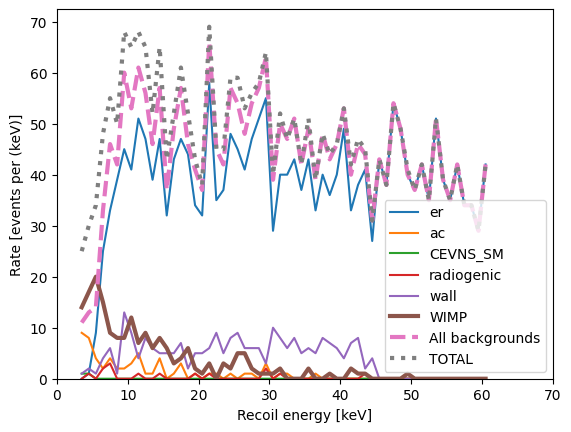

In [57]:
### DIFF RATE: PLOT FOR 1 EXAMPLE ###

plt.plot(center_keVNR, diff_rate_er[pseudo_example], label='er')
plt.plot(center_keVNR, diff_rate_ac[pseudo_example], label='ac')
plt.plot(center_keVNR, diff_rate_cevns_sm[pseudo_example], label='CEVNS_SM')
plt.plot(center_keVNR, diff_rate_radio[pseudo_example], label='radiogenic')
plt.plot(center_keVNR, diff_rate_wall[pseudo_example], label='wall')
plt.plot(center_keVNR, diff_rate_wimp[pseudo_example], lw=3, label='WIMP')

plt.plot(center_keVNR, diff_rate_bkg[pseudo_example], '--', lw=3, label='All backgrounds')
plt.plot(center_keVNR, diff_rate_total[pseudo_example], ':', lw=3, label='TOTAL')

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV)]")
plt.xlim(0, 70)
plt.ylim(0, None)
plt.legend()

plt.show()

Full s1s2: 


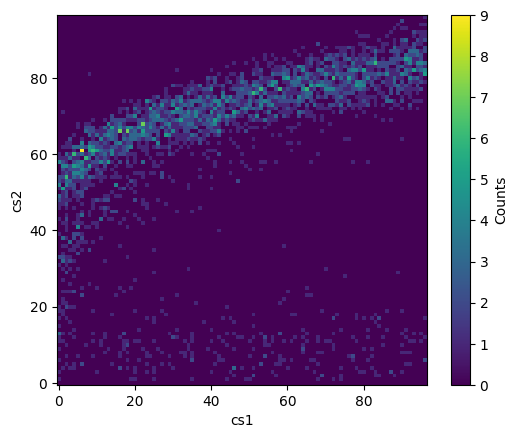


Smaller s1s2 and only in Signal Region (to avoid lots of zeros): 


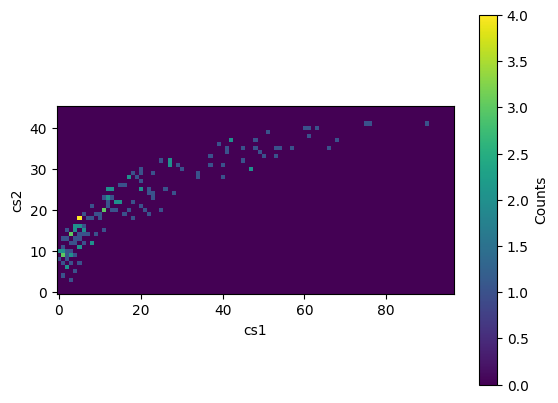


 RATE in SIGNAL REGION: 

# events full:  2966.0
# events in SR:  149.0


In [58]:
### s1s2: PLOT FOR 1 EXAMPLE ###

print('Full s1s2: ')

example_er = np.loadtxt(datFolder+'s1s2_er.txt')[pseudo_example]
example_ac = np.loadtxt(datFolder+'s1s2_ac.txt')[pseudo_example]
example_cevns_sm = np.loadtxt(datFolder+'s1s2_CEVNS-SM.txt')[pseudo_example]
example_radio = np.loadtxt(datFolder+'s1s2_radiogenics.txt')[pseudo_example]
example_wall = np.loadtxt(datFolder+'s1s2_wall.txt')[pseudo_example]
example_wimp = np.loadtxt(datFolder+'s1s2_WIMP.txt')[pseudo_example]
#example_cevns_nsi = np.loadtxt(datFolder+'s1s2_CEVNS-NSI.txt')[pseudo_example]
#example_eves_nsi = np.loadtxt(datFolder+'s1s2_EVES-NSI.txt')[pseudo_example]
#example_eves_sm = np.loadtxt(datFolder+'s1s2_EVES-SM.txt')[pseudo_example]

example_total = example_er + example_ac + example_cevns_sm + example_radio + example_wall + example_wimp # + example_cevns_nsi + example_eves_nsi + example_eves_sm


plt.imshow(example_total.reshape( 97,97 ).T, origin='lower', cmap='viridis')
plt.colorbar(label='Counts')  # Add a colorbar to the plot
plt.xlabel('cs1')
plt.ylabel('cs2')
#plt.yscale('log')
plt.show()




print('\nSmaller s1s2 and only in Signal Region (to avoid lots of zeros): ')
plt.imshow(np.asarray(s1s2_masked_total[pseudo_example]).reshape( 97,46 ).T, origin='lower', cmap='viridis')
plt.colorbar(label='Counts')  # Add a colorbar to the plot
plt.xlabel('cs1')
plt.ylabel('cs2')
#plt.yscale('log')
plt.show()



print('\n RATE in SIGNAL REGION: ')
print('\n# events full: ', sum(example_total) )

print('# events in SR: ', rate_masked_total[pseudo_example] )